<a href="https://colab.research.google.com/github/YvTur/netflix_kaggle/blob/main/Analisis_de_data_set_de_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of netflix dataset


##1.Data collection
Downloaded this dataset from kaggle to learn more data analysis. The link is the following one.

https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset

I upload the info to my personal github. This is easier for me to work among my different devices



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root_file = '/content/drive/MyDrive/ColabN/netflix/netflix.csv'

In [3]:
import pandas as pd
df = pd.read_csv(root_file)

In [4]:
df.shape

(20572, 8)

In [5]:
df.head(3)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,519483.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1229149.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,212837.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."


In [6]:
df.tail(3)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
20569,NaN,tv,NaN,NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20570,NaN,tv,NaN,2022.0,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20571,NaN,tv,"Family, Kids, Animation",2023.0,NaN,NaN,NaN,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, NI, PA..."


In this point I see that there is empty rows that affect the analysis.
I am going to erase the column imbdId. i do not have use for this column and I prefered to have a more light weight dataset.

##2. Cleaning

In [7]:
df = df.drop(columns=['imdbId'])

In [8]:
#In this section we create a new csv

#the following code generate a csv file here on colab, this gets erase. Does not work
#df.to_csv('cleaned_netflix_dataset.csv', index=False)

#the following generates the csv on drive
import pandas as pd


# Specify the desired file path on Google Drive
file_path = '/content/drive/MyDrive/ColabN/netflix/cleaned_netflix_dataset.csv'
df.to_csv(file_path, index=False)

print(f"CSV file saved to: {file_path}")

CSV file saved to: /content/drive/MyDrive/ColabN/netflix/cleaned_netflix_dataset.csv


In [9]:
df.tail(5)

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
20567,NaN,tv,NaN,2025.0,NaN,NaN,JP
20568,NaN,tv,NaN,NaN,NaN,NaN,"AT, CH, DE, HK, ID, IN, IT, JP, KR, LI, MY, PH..."
20569,NaN,tv,NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20570,NaN,tv,NaN,2022.0,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20571,NaN,tv,"Family, Kids, Animation",2023.0,NaN,NaN,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, NI, PA..."


In [10]:
missing_count = df['title'].isnull().sum()
print(f"Number of missing values in 'title': {missing_count}")

missing_count = df['type'].isnull().sum()
print(f"Number of missing values in 'type': {missing_count}")

missing_count = df['genres'].isnull().sum()
print(f"Number of missing values in 'genres': {missing_count}")

missing_count = df['releaseYear'].isnull().sum()
print(f"Number of missing values in 'releaseYear': {missing_count}")

missing_count = df['imdbAverageRating'].isnull().sum()
print(f"Number of missing values in 'imdbAverageRating': {missing_count}")

missing_count = df['imdbNumVotes'].isnull().sum()
print(f"Number of missing values in 'imdbNumVotes': {missing_count}")

missing_count = df['availableCountries'].isnull().sum()
print(f"Number of missing values in 'availableCountries': {missing_count}")





Number of missing values in 'title': 569
Number of missing values in 'type': 0
Number of missing values in 'genres': 314
Number of missing values in 'releaseYear': 23
Number of missing values in 'imdbAverageRating': 1625
Number of missing values in 'imdbNumVotes': 1625
Number of missing values in 'availableCountries': 0


In [11]:
df.shape

(20572, 7)

In [12]:
#In this part of code I eliminate that I have more than three empty values on a row.
df = df.dropna(thresh=len(df.columns) - 3 + 1)

In [13]:
df.to_csv('cleaned_netflix_dataset.csv', index=False)

In [14]:
df.tail()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
20547,The Later Daters,tv,"Reality-TV, Romance",2024.0,6.9,299.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20551,The Kings of Tupelo: A Southern Crime Saga,tv,"Crime, Documentary",2024.0,6.6,1139.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20556,UniverXO Dabiz,tv,Documentary,2024.0,5.7,65.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
20559,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1985.0,8.7,165.0,"AT, CH, DE, LI"
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,"AR, BO, CL, CO, CR, CU, DO, EC, GT, HN, MX, NI..."


I have lost more data than expected but I think it is for the best.


In [15]:
df.shape

(19832, 7)

In [16]:
#We are going to review if we have any duplicated.
df.duplicated().sum()

0

There are several mistakes on this first part of the code. The difference between the df and df1, the generation of the data set on the interface of colab etc. But at least I have all the steps, they are not in a proper arrange but I can use all this code to generate a "clean" dataset. I am going to be modifying this in case of any more cleaning

edit 1: I added a duplicate.i did not have. Great 01/30/25

##3. Exploratory Data analysis

#### **Section 1**

Research questions

1 How many different movies does netflix has?

2 How many different tv shows does netflix has?

In [17]:
#tv_counts=df["type"].value_counts()
# Count the occurrences of 'tv' in the 'type' column
tv_count = df['type'].value_counts()['tv']

print("Count of 'tv':", tv_count)

movie_count = df['type'].value_counts()['movie']

print("Count of 'movie':", movie_count)


Count of 'tv': 4249
Count of 'movie': 15583


#### **Section 2**

Which is the year that most movies were released?

Which is the year that most tv shows were released?


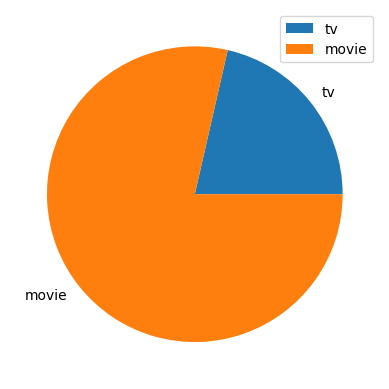

In [18]:
import matplotlib.pyplot as plt
import numpy as np

y=np.array([tv_count,movie_count])
mylabels=["tv","movie"]

plt.pie(y,labels=mylabels)
plt.legend()
plt.show()

In [19]:
# Group the data by year and count the number of movies and TV shows
grouped_data = df.groupby(['releaseYear', 'type']).size().unstack()
print(grouped_data)



type          movie     tv
releaseYear               
1913.0          1.0    NaN
1917.0          1.0    NaN
1918.0          1.0    NaN
1919.0          2.0    NaN
1920.0          2.0    NaN
...             ...    ...
2021.0       1040.0  466.0
2022.0       1321.0  556.0
2023.0       1219.0  478.0
2024.0        680.0  435.0
2025.0          4.0    NaN

[106 rows x 2 columns]


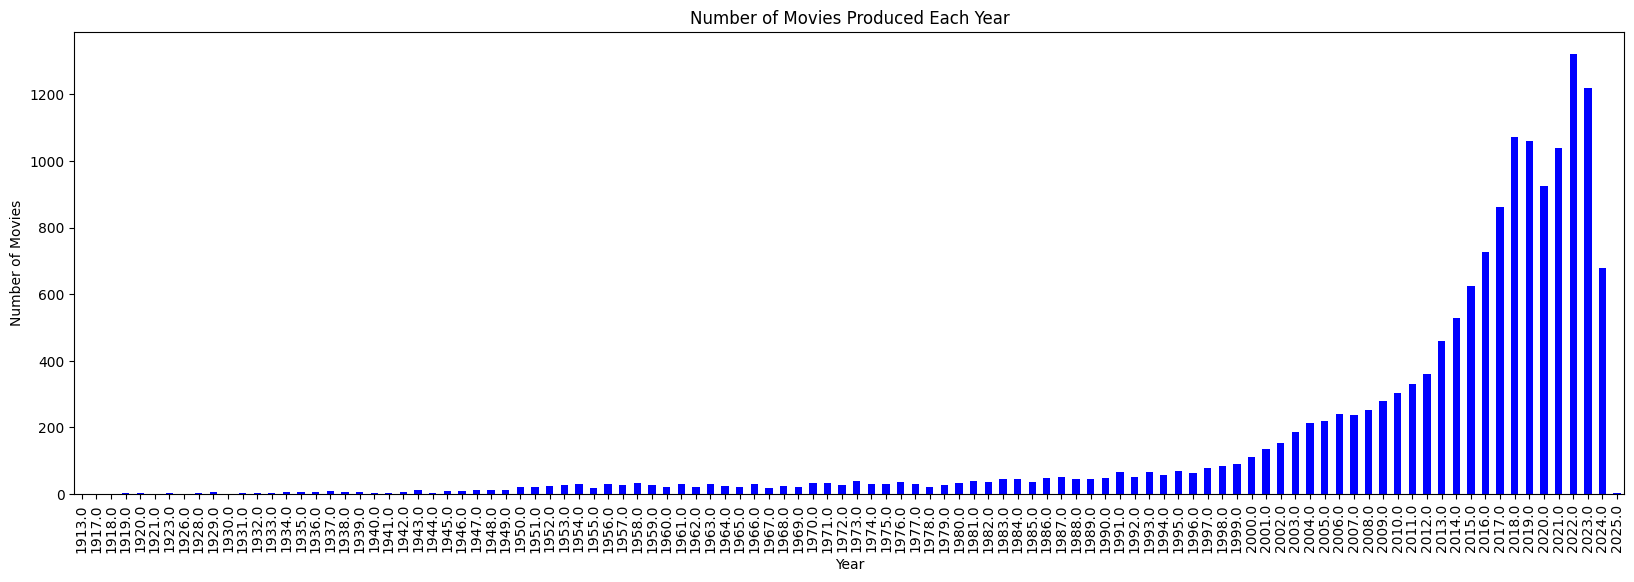

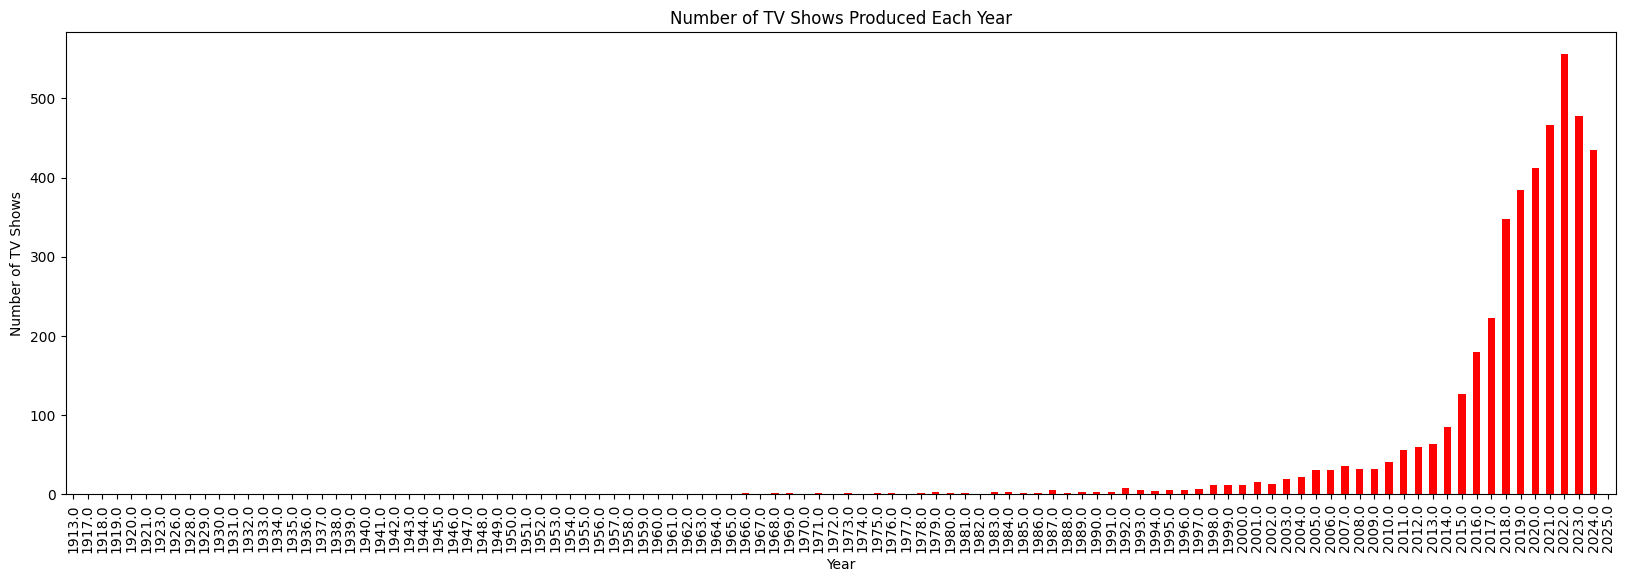

In [20]:
# Create a bar plot for movies
plt.figure(figsize=(20, 6))
grouped_data['movie'].plot(kind='bar', color='blue')
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
#plt.xticks(rotation=45)
plt.show()

# Create a bar plot for TV shows
plt.figure(figsize=(20, 6))
grouped_data['tv'].plot(kind='bar', color='red')
plt.title('Number of TV Shows Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
#plt.xticks(rotation=45)
plt.show()


<Figure size 6000x600 with 0 Axes>

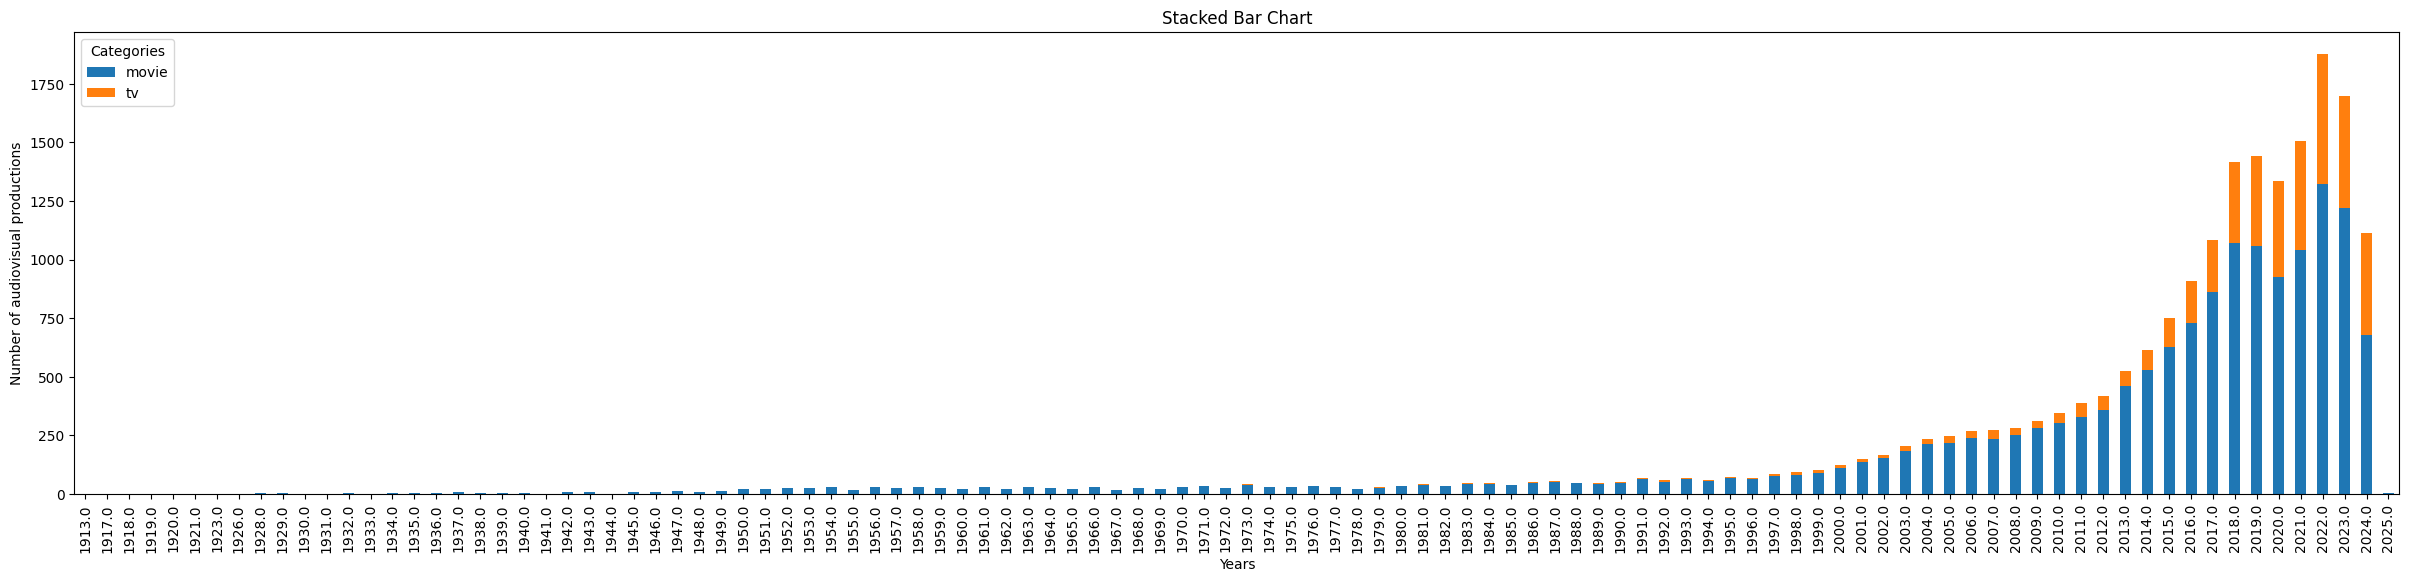

In [21]:
# Create the stacked bar chart using pandas' plotting functionality
plt.figure(figsize=(60, 6))
grouped_data.plot(kind='bar', stacked=True, figsize=(30, 6))

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Number of audiovisual productions')
plt.title('Stacked Bar Chart')
plt.legend(title='Categories')

# Show the plot
plt.show()

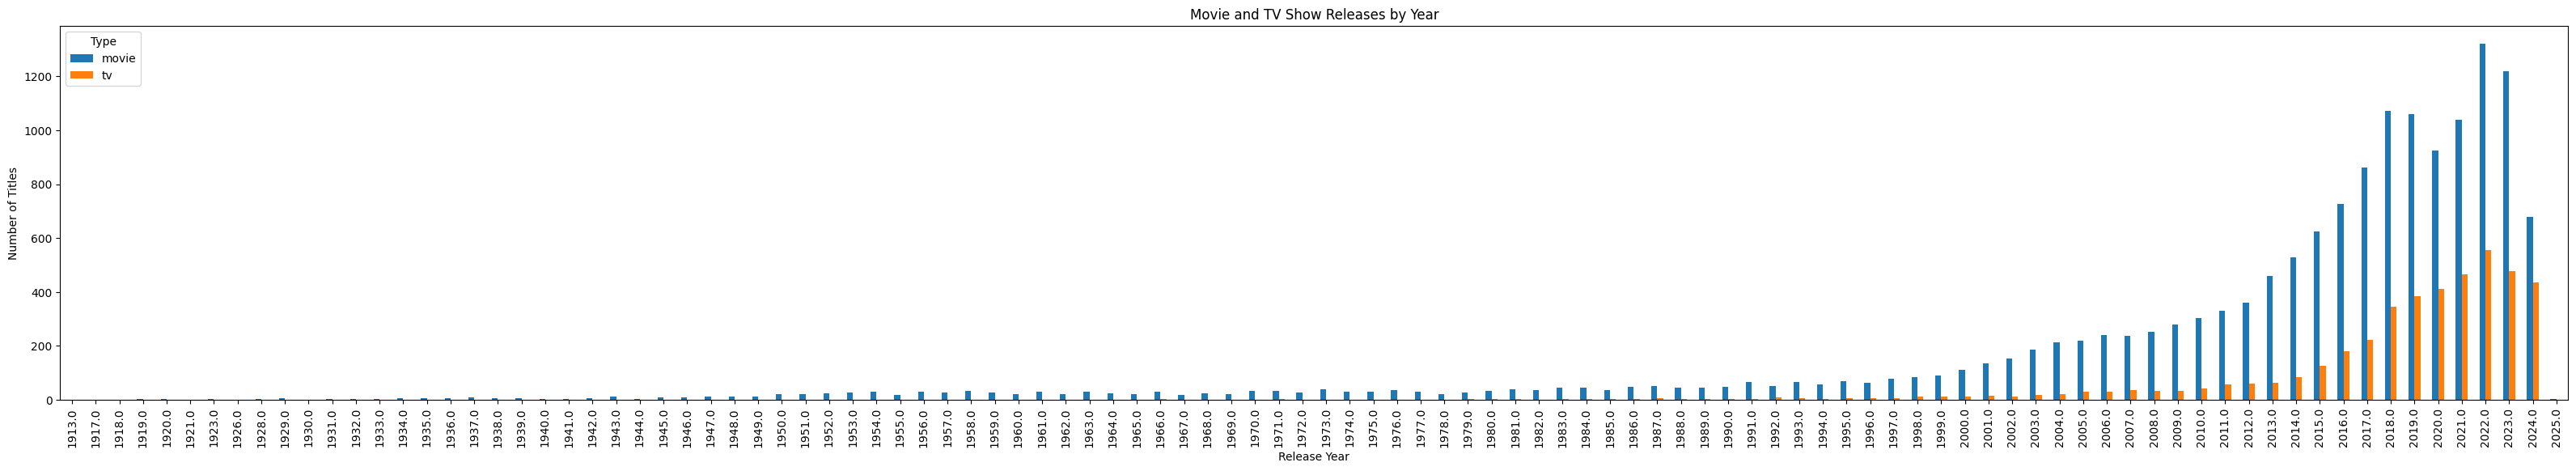

In [22]:
# Create the grouped bar chart
grouped_data.plot(kind='bar', figsize=(40, 6))

# Customize the plot (optional)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Movie and TV Show Releases by Year')
plt.legend(title='Type')

# Show the plot
plt.show()

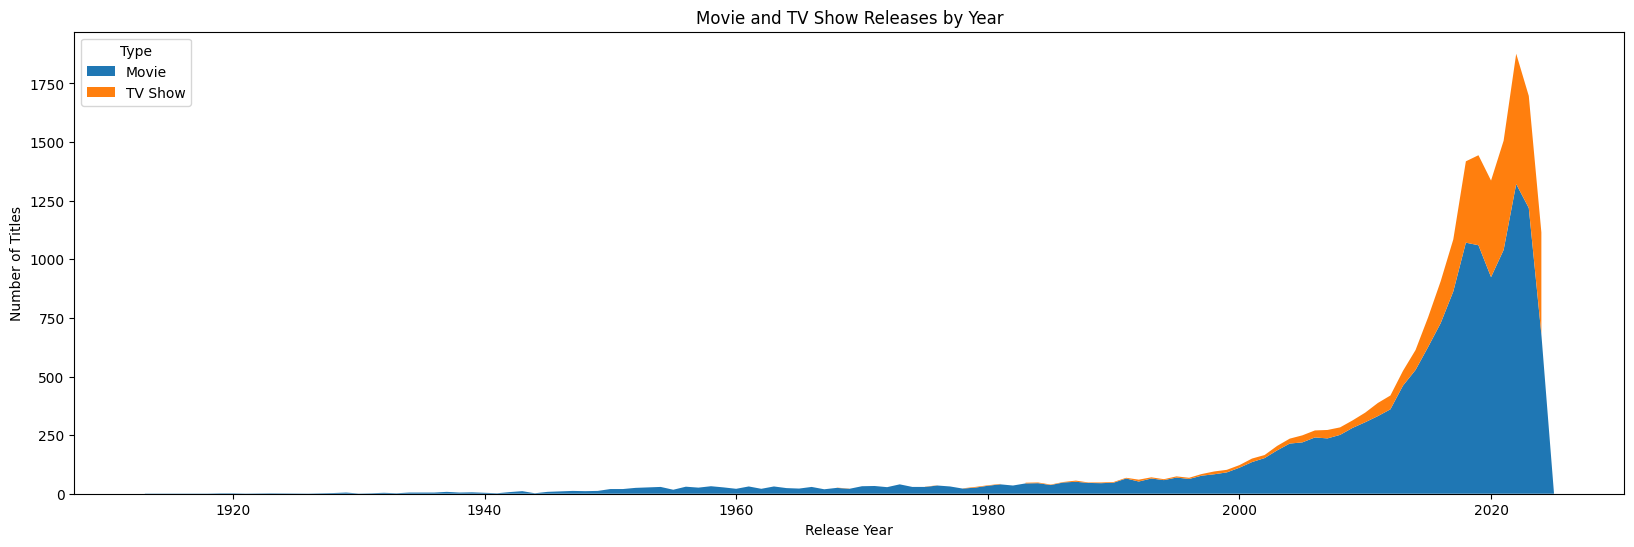

In [24]:
#make stack graph
fig, ax = plt.subplots(figsize=(20, 6))
plt.stackplot(grouped_data.index, grouped_data['movie'].values , grouped_data['tv'].values , labels=['Movie', 'TV Show'])

# Customize the plot (optional)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Movie and TV Show Releases by Year')
plt.legend(title='Type', loc='upper left')

plt.show()

In [25]:
#I call this again because it looks bigger if you call and not print
grouped_data.sort_index()

type,movie,tv
releaseYear,,
1913.0,1.0,NaN
1917.0,1.0,NaN
1918.0,1.0,NaN
1919.0,2.0,NaN
1920.0,2.0,NaN
...,...,...
2021.0,1040.0,466.0
2022.0,1321.0,556.0
2023.0,1219.0,478.0


In [26]:
#Lets solve the questions about the year with most tv and movie productions released
max_value_movies = grouped_data['movie'].max()
year_with_max_movies = grouped_data['movie'].idxmax()

print("The year with most movies released is:", year_with_max_movies, " and the number is:", max_value_movies )

max_value_tv = grouped_data['tv'].max()
year_with_max_tv = grouped_data['tv'].idxmax()

print("The year with most tv released is:", year_with_max_tv, " and the number is:", max_value_tv )


The year with most movies released is: 2022.0  and the number is: 1321.0
The year with most tv released is: 2022.0  and the number is: 556.0


#### **Seccion 3**

In how many differente countries does netflix has business?

In [27]:
# Extract unique countries
#In the following line we create a list for adding the countries
all_countries1 = []

#review each row of a column
for countries1 in df['availableCountries']:

#review each elemen inside a row, the element will be identify by the comma separation
    for country1 in countries1.split(','):
        all_countries1.append(country1.strip())  # Remove leading/trailing spaces

country_counts = pd.Series(all_countries1).value_counts()

print('Netflix has business in:',len(country_counts), 'countries')

Netflix has business in: 131 countries


#### **Section 4**
Country with the most audiovisual productions?

Country with the less audiovisual productions?

In [28]:
# a print of the list of the total number of productions by country
country_counts

,count
SK,8869
BG,8725
SI,8620
IS,8609
LT,8535
...,...
PF,6092
YE,6070
IL,5803
UA,3191


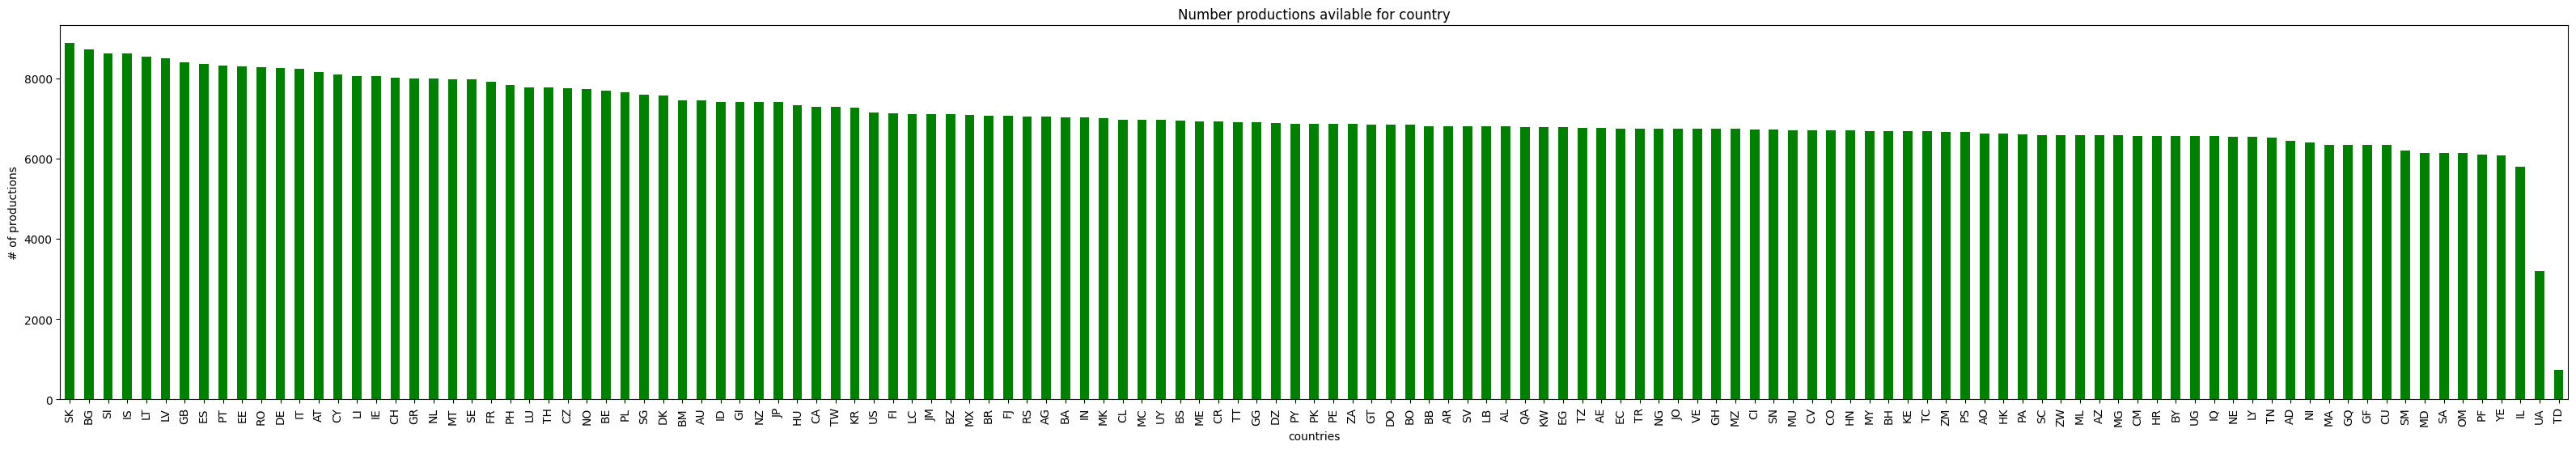

In [29]:
# Create a bar plot for all productions
plt.figure(figsize=(40, 6))
country_counts.plot(kind='bar', color='green')

plt.title('Number productions avilable for country')
plt.xlabel('countries')
plt.ylabel('# of productions')

plt.show()

In [30]:
#country with the most audiovisual productions
max_productions = country_counts.max()
country_max_productions = country_counts.idxmax()

print(country_max_productions, max_productions)



min_value_production = country_counts.min()
country_min_productions = country_counts.idxmin()

print(country_min_productions, min_value_production)

SK 8869
TD 738


SK means Slovakia
TD means Trinidad y Tobago

In [31]:
#The following line of code is only for determine how much productions are availabe at a single country.
#I am using mx as an example

country_selected='MX'

print(country_selected, country_counts['MX'])

MX 7079


#### **Section 5**

which are the countries with the most TV and Movies?

Which are the countries with the less Tv and Movies?


In [32]:
# Split 'availableCountries' into individual rows
df_expanded = df.assign(availableCountries=df["availableCountries"].str.split(", ")).explode("availableCountries")


In [33]:
df_expanded

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,CH
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,DE
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1229149.0,AE
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1229149.0,AL
...,...,...,...,...,...,...,...
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PE
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PY
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,SV
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,UY


In [34]:
# Count the number of movies and TV shows for each country
df_type_by_country = df_expanded.groupby(["availableCountries", "type"]).size().unstack(fill_value=0)

df_type_by_country

type,movie,tv
availableCountries,,
AD,4111,2338
AE,4245,2513
AG,4373,2671
AL,4250,2545
AO,3924,2696
...,...,...
VE,4055,2679
YE,3546,2524
ZA,4117,2736


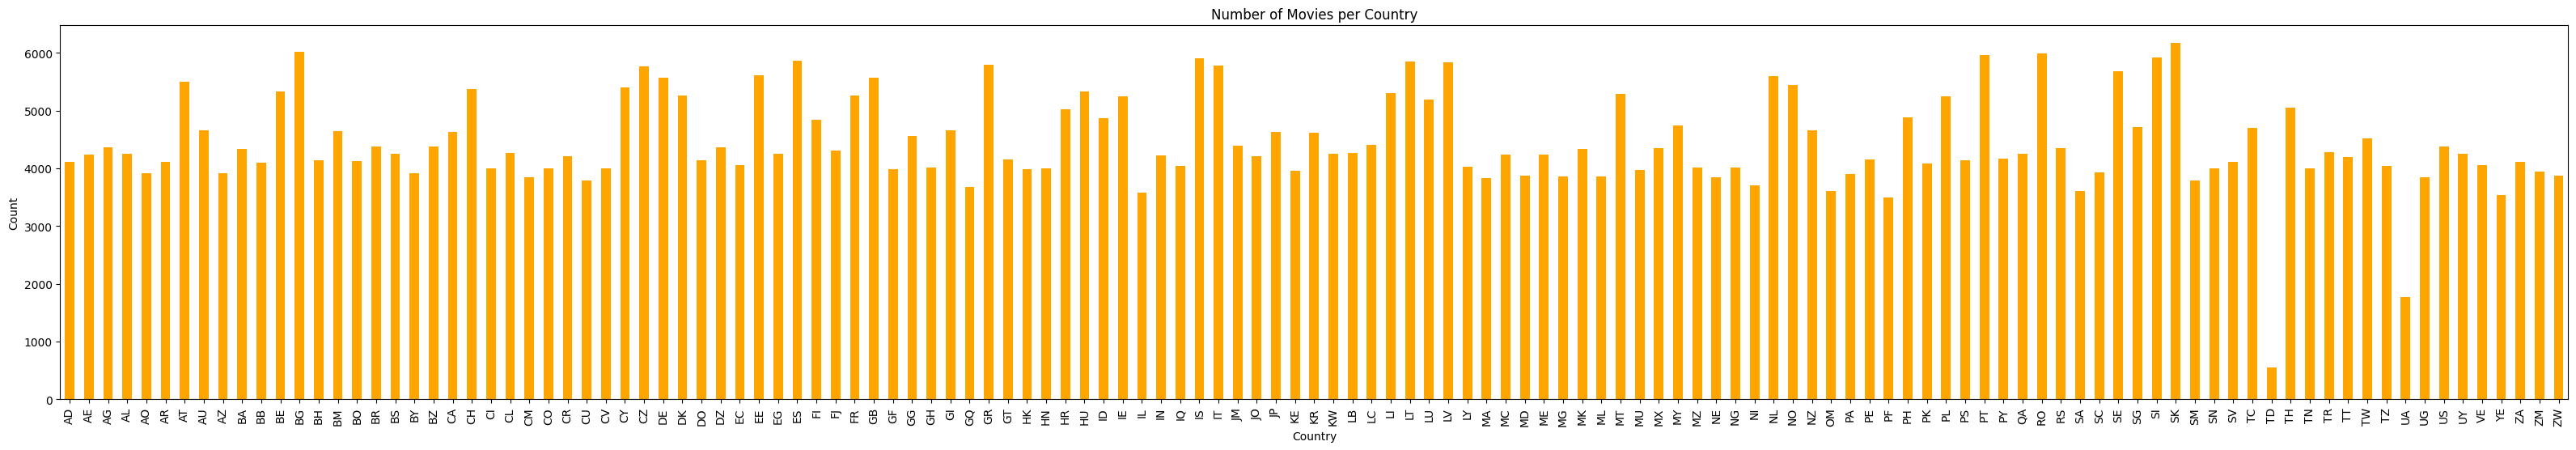

In [35]:
# Assuming you have your data in a DataFrame named 'result'

# Create a figure with a wider width for better bar chart visualization
plt.figure(figsize=(40, 6))

# Create a bar chart using 'bar' kind
df_type_by_country['movie'].plot(kind='bar', color='orange')  # Color bars

# Add labels and title
plt.title('Number of Movies per Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotate x-axis labels for better readability with many countries
#plt.xticks(rotation=45, ha='right')  # Rotate and right-align

# Display the plot
plt.show()

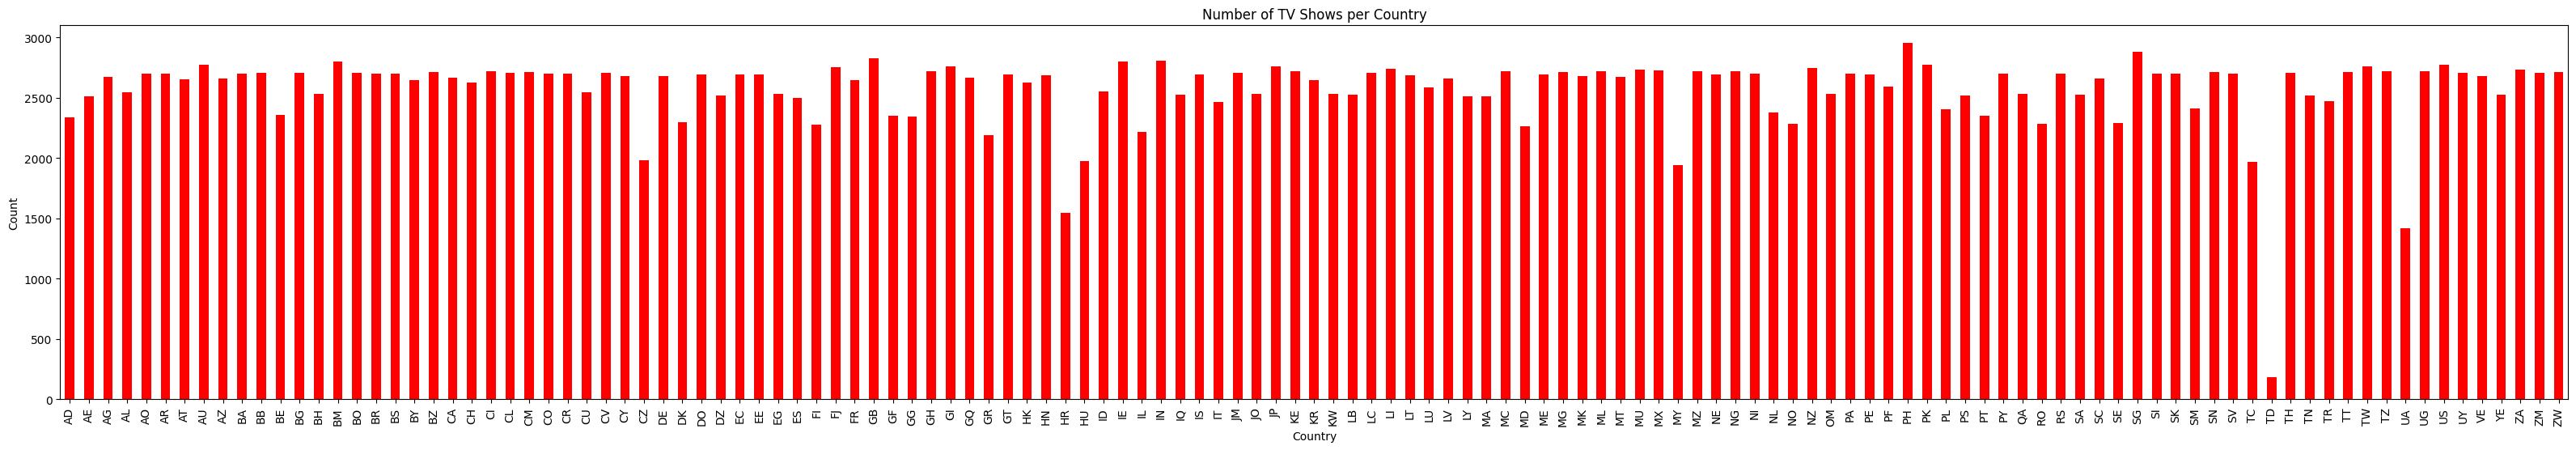

In [36]:
# Create a figure with a wider width for better bar chart visualization
plt.figure(figsize=(40, 6))

# Create a bar chart using 'bar' kind
df_type_by_country['tv'].plot(kind='bar', color='red')  # Color bars

# Add labels and title
plt.title('Number of TV Shows per Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Display the plot
plt.show()


<BarContainer object of 131 artists>

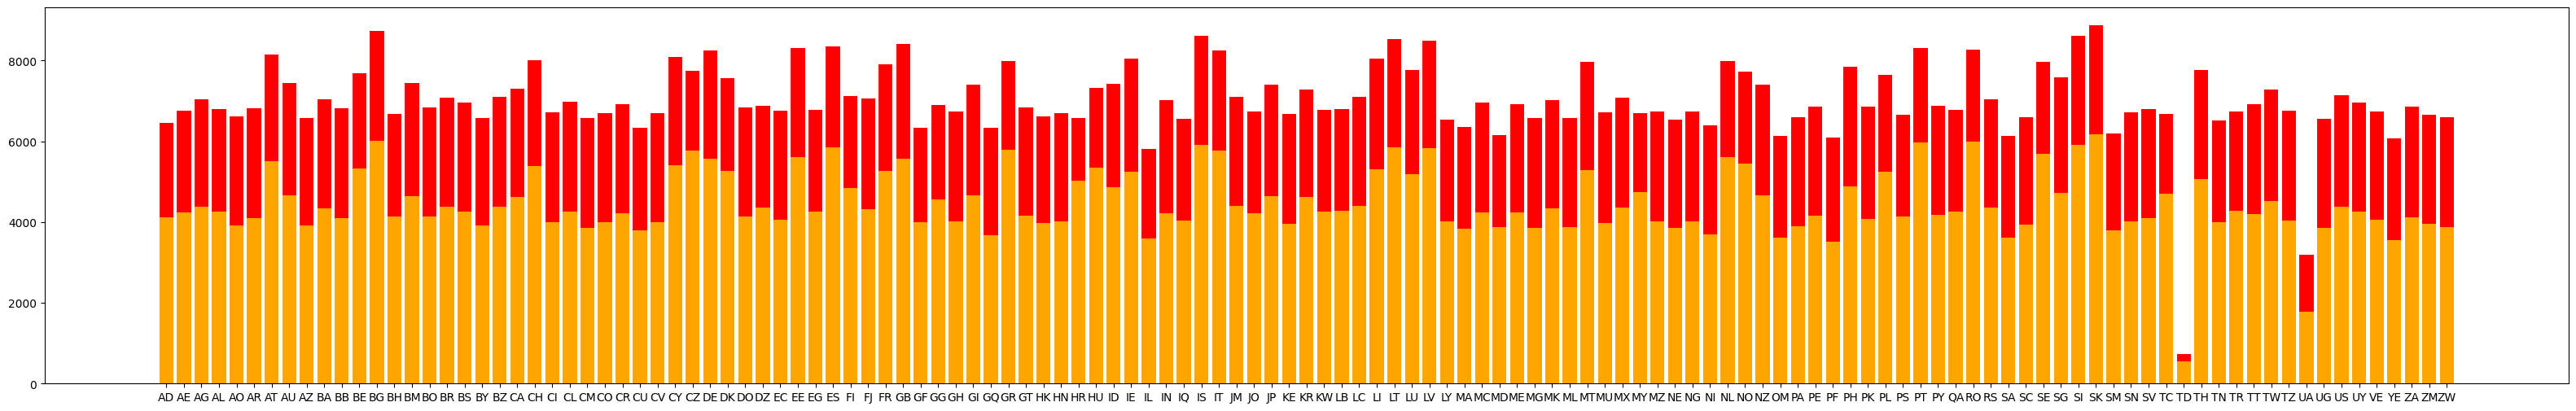

In [37]:
# Plotting the stacked bar chart
plt.figure(figsize=(40, 6))

# Plot the 'movie' bars first
plt.bar(df_type_by_country.index, df_type_by_country['movie'], label='Movie', color='orange')

# Plot the 'tv' bars on top of the 'movie' bars
# bottom=df['movie'] is key
plt.bar(df_type_by_country.index, df_type_by_country['tv'], bottom=df_type_by_country['movie'], label='TV', color='red')

<BarContainer object of 131 artists>

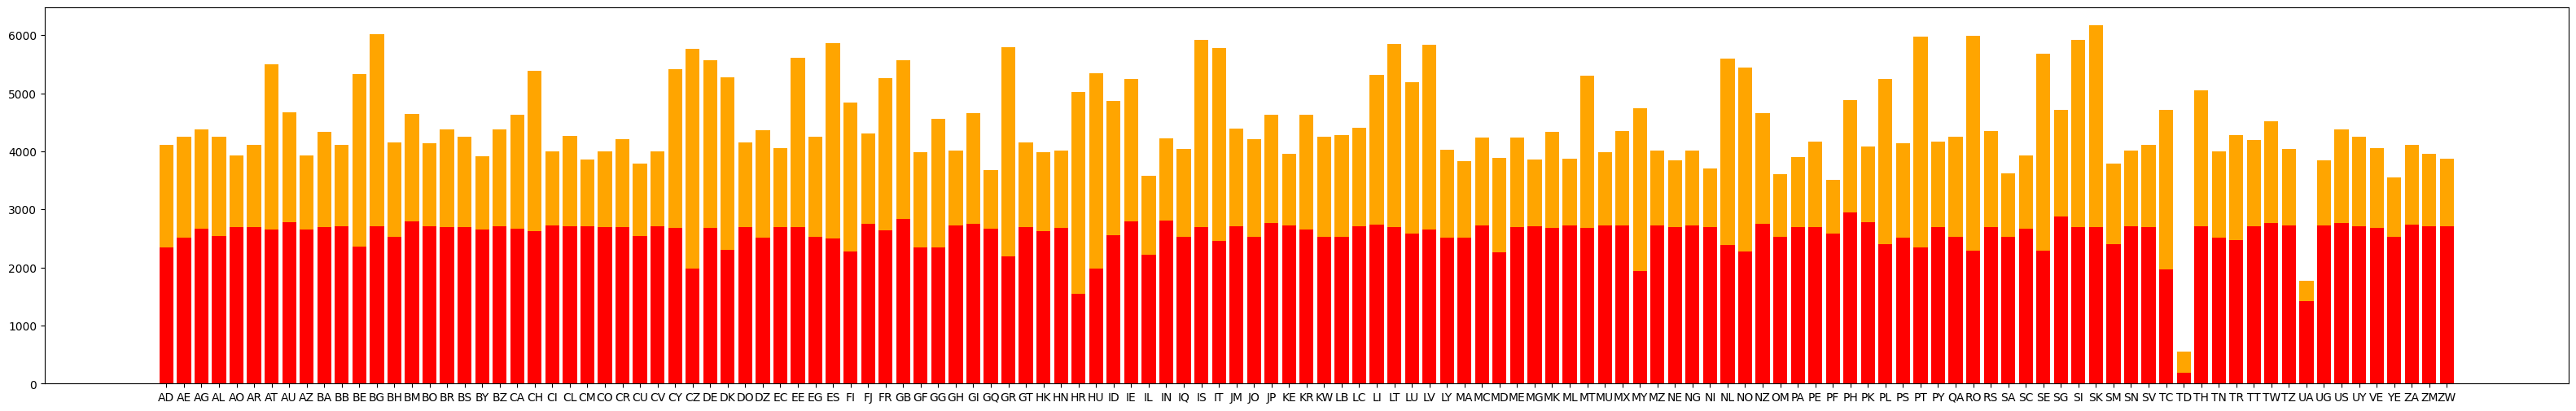

In [38]:
# Plotting the stacked bar chart
plt.figure(figsize=(40, 6))

# Plot the 'movie' bars first
plt.bar(df_type_by_country.index, df_type_by_country['movie'], label='Movie', color='orange')

# Plot the 'tv' bars first
plt.bar(df_type_by_country.index, df_type_by_country['tv'], label='tv', color='red')

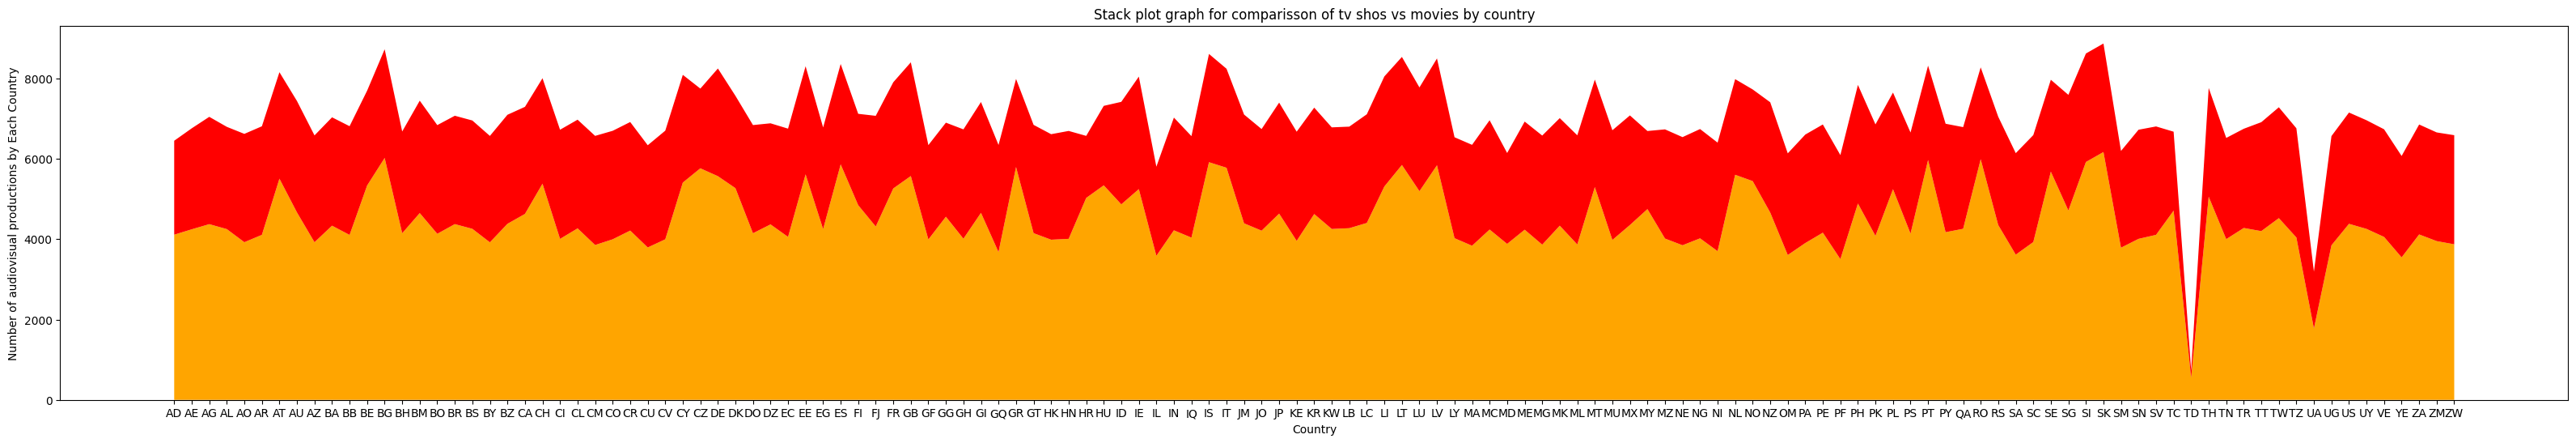

In [39]:
#Stack plot

plt.figure(figsize=(40, 6))

plt.stackplot(df_type_by_country.index, df_type_by_country['movie'].values, df_type_by_country['tv'].values, labels=['Movie', 'TV Show'], colors=['orange','red'])
plt.title('Stack plot graph for comparisson of tv shos vs movies by country')
plt.xlabel('Country')
plt.ylabel('Number of audiovisual productions by Each Country')
#plt.xticks(rotation=45)
plt.show()

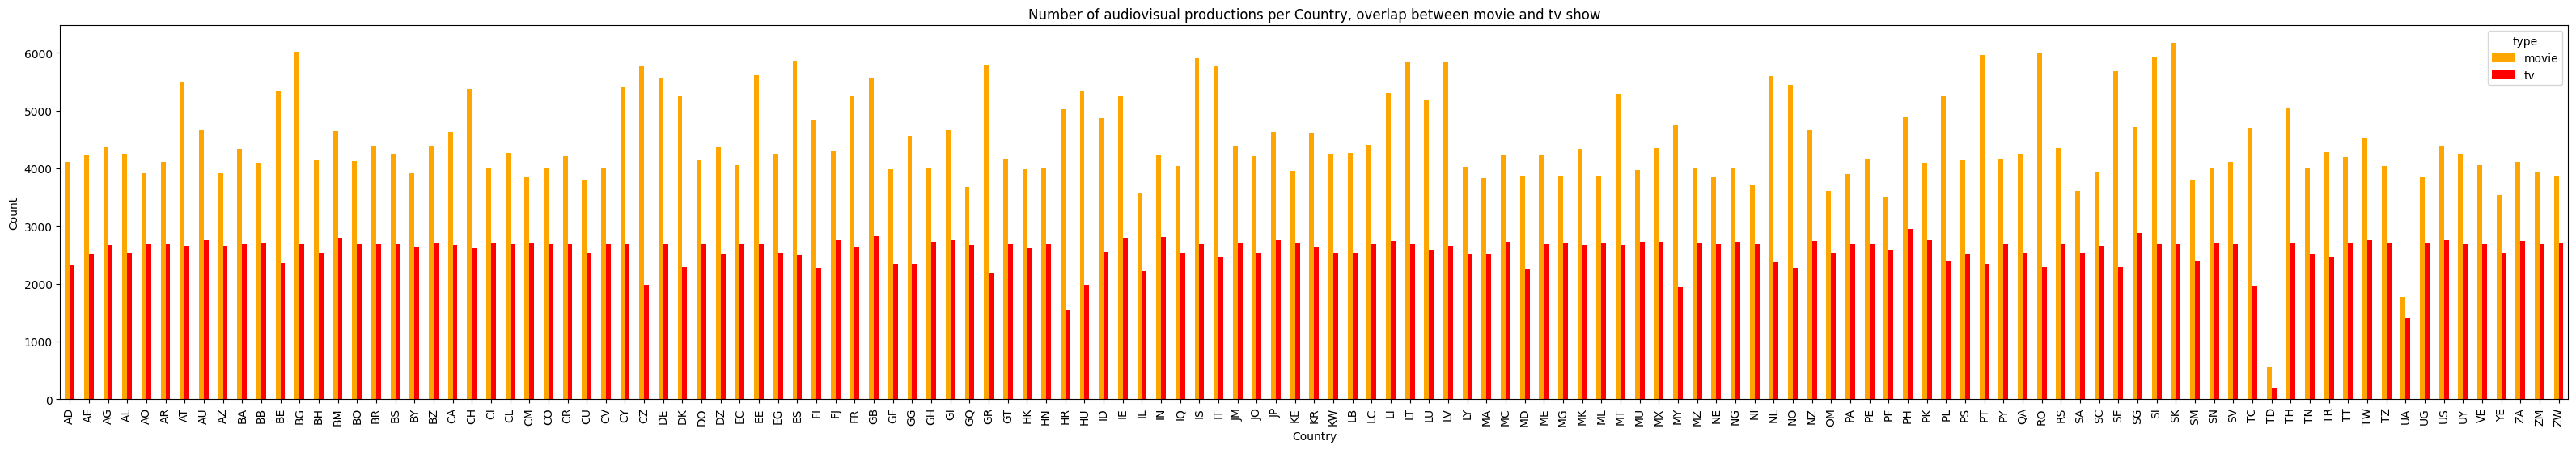

In [40]:
# Create a figure with a wider width for better bar chart visualization
df_type_by_country[['movie', 'tv']].plot(kind='bar', color=['orange', 'red'], figsize=(40,6))

# Add labels and title
plt.title('Number of audiovisual productions per Country, overlap between movie and tv show')
plt.xlabel('Country')
plt.ylabel('Count')

# Display the plot
plt.show()

In [41]:
#Get the countries with the most movies and most tv shows
#most movies
max_movie=df_type_by_country['movie'].max()
max_movie_id=df_type_by_country['movie'].idxmax()

print("the country with the most movies: ", max_movie_id, max_movie)

#most tv shows
max_tv=df_type_by_country['tv'].max()
max_tv_id=df_type_by_country['tv'].idxmax()

print("the country with the most tv shows ", max_tv_id, max_tv)


the country with the most movies:  SK 6168
the country with the most tv shows  PH 2951


Country codes

SK is Slovakia

PH is Philippines


In [42]:
#Get the countries with the less movies and less tv shows
#less movies
min_movie=df_type_by_country['movie'].min()
min_movie_id=df_type_by_country['movie'].idxmin()

print("the country with the less movies: ", min_movie_id, min_movie)


#less tv shows
min_tv=df_type_by_country['tv'].min()
min_tv_id=df_type_by_country['tv'].idxmin()

print("the country with the less tv shows ", min_tv_id, min_tv)


the country with the less movies:  TD 552
the country with the less tv shows  TD 186


The country with less movies   Trinidad and Tobago

The country with less tv shows Trinidad and Tobago

#### **Section 6**
Top five countries with the most movies

Top five countries with the most TV shows

Less five countries with the most movies

Less five countries with the most TV shows

In [43]:
#Top five countries with the most TV shows

top_shows=df_type_by_country.nlargest(5, 'tv')
clean_top_shows=top_shows.drop(['movie',], axis=1)
print(clean_top_shows)

type                  tv
availableCountries      
PH                  2951
SG                  2878
GB                  2830
IN                  2805
IE                  2800


In [44]:
#Top five countries with the most movies

top_movie=df_type_by_country.nlargest(5, 'movie')
clean_top_movie=top_movie.drop(['tv',], axis=1)
print(clean_top_movie)

type                movie
availableCountries       
SK                   6168
BG                   6021
RO                   5989
PT                   5969
SI                   5920


In [45]:
#Less five countries with the most TV shows

bottom_shows=df_type_by_country.nsmallest(5, 'tv')
clean_bottom_shows=bottom_shows.drop(['movie',], axis=1)
print(clean_bottom_shows)

type                  tv
availableCountries      
TD                   186
UA                  1415
HR                  1544
MY                  1943
TC                  1965


In [46]:
#Less five countries with the most movies

bottom_movie=df_type_by_country.nsmallest(5, 'movie')
clean_bottom_movie=bottom_movie.drop(['tv',], axis=1)
print(clean_bottom_movie)

type                movie
availableCountries       
TD                    552
UA                   1776
PF                   3503
YE                   3546
IL                   3585


#### **Section 7**
How many different genres does netflix has and which ones?



In [47]:
# Extract unique countries

#In the following line we create a list for adding the countries
all_genres = []

#review each row of a column
for genres in df['genres']:

#review each elemen inside a row, the element will be identify by the comma separation
    for genre in genres.split(','):
        all_genres.append(genre.strip())  # Remove leading/trailing spaces

genres_counts = pd.Series(all_genres).value_counts()



In [48]:
genres_counts

,count
Drama,9356
Comedy,7129
Action,3286
Romance,2904
Crime,2844
Adventure,2354
Documentary,2154
Thriller,2054
Animation,1967
Mystery,1378


In [50]:
#We review the total number of genres in Netflix
len(genres_counts)

30

Netflix has 30 different genres worldwide.

This is for the full catalogue worldwide.

#### **Section 8**

Top five genres

how much the top five represent on overal netflix catalogue

In [51]:
#In this part we call the top 5 genres
#it is possible to call to differente
genres_counts.nlargest(5)

,count
Drama,9356
Comedy,7129
Action,3286
Romance,2904
Crime,2844


In [52]:
#We are going to summ all the differente audiovisual projects.
#The number is going to be a lot more big than the audiovisal productions total number
#This is happenning due we have repeated title due titles have several genres.
sum_all_genres_productions=genres_counts.sum()

#We are going to focus only on top 5 genres to make analysis
sum_top_genres=genres_counts.nlargest(5).sum()

print(sum_all_genres_productions)
print(sum_top_genres)

43252
25519


In [53]:
#In order to understand that the top five genres is a very representative samble of the catalogue universe
#We are going to verify how much the top five represents of the whole unvierse of genres

x=sum_top_genres/sum_all_genres_productions
y=x*100
print(y, "it is the percentage that the top five genres represent.")

59.00073985018034 it is the percentage that the top five genres represent.


In [54]:
#As an interesting review
#This is the bottom 5 genres
genres_counts.nsmallest(5)

,count
Adult,1
Film-Noir,10
News,10
Science Fiction,13
TV Movie,14


#### **Section 9**

Which is the country with the most genres?

which is the country with the less genres?

In [55]:
df_expanded


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,CH
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519483.0,DE
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1229149.0,AE
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1229149.0,AL
...,...,...,...,...,...,...,...
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PE
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PY
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,SV
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,UY


In [56]:
# Split the genres string into lists
df_expanded['genres'] = df_expanded['genres'].str.split(', ')

# Explode the DataFrame so each genre is on a separate row
df_exploded = df_expanded.explode('genres')

In [57]:
df_exploded

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,Action,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Adventure,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Sci-Fi,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Action,1997.0,7.6,519483.0,CH
0,The Fifth Element,movie,Adventure,1997.0,7.6,519483.0,CH
...,...,...,...,...,...,...,...
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PE
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PY
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,SV
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,UY


In [58]:
df_exploded.shape

(2044600, 7)

In [59]:
# Group by country and genre, then count the unique genres per country
genre_by_country = df_exploded.groupby(['availableCountries', 'genres']).size().reset_index(name='count')

# Group by country and count the number of unique genres
unique_genre_counts = genre_by_country.groupby('availableCountries')['genres'].nunique()

# Optional: Print genre counts for all countries
#print("\nGenre Counts per Country:")
#print(unique_genre_counts)
unique_genre_counts

,genres
availableCountries,
AD,28
AE,28
AG,28
AL,28
AO,28
...,...
VE,28
YE,28
ZA,28


In [60]:
# Find the country with the most unique genres
country_with_most_genres = unique_genre_counts.idxmax()
max_genre_count = unique_genre_counts.max()

print(f"The country with the most genres is: {country_with_most_genres} with {max_genre_count} genres.")

The country with the most genres is: AT with 29 genres.


Austira is the country with the most genres

In [61]:
# Find the country with the most unique genres
country_with_less_genres = unique_genre_counts.idxmin()
less_genre_count = unique_genre_counts.min()

print(f"The country with less genres is: {country_with_less_genres} with {less_genre_count} genres.")

The country with less genres is: TD with 25 genres.


TD is Cha. Country in Africa. It is the country with less genres

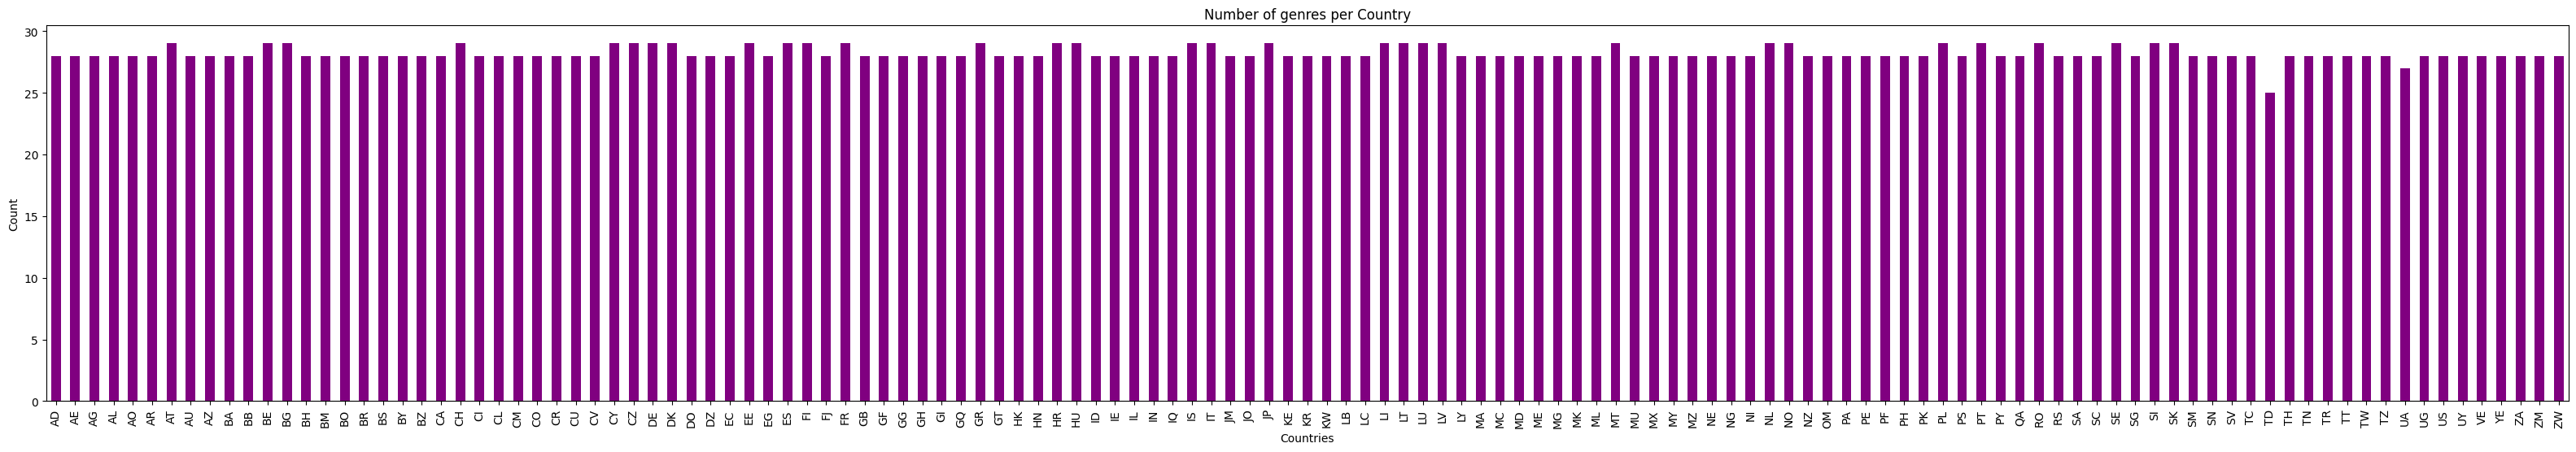

In [62]:
# Create a figure with a wider width for better bar chart visualization
plt.figure(figsize=(40, 6))

# Create a bar chart using 'bar' kind
unique_genre_counts.plot(kind='bar', color='purple')  # Color bars

# Add labels and title
plt.title('Number of genres per Country')
plt.xlabel('Countries')
plt.ylabel('Count')

# Display the plot
plt.show()

#### **Section 10**

Difference of genres in tv shows vs movies


In [63]:
# Group by country and genre, then count the unique genres per country
genre_counts_byType = df_exploded.groupby(['availableCountries','type','genres']).size().reset_index(name='count')



In [64]:
# Group by country and count the number of unique genres
unique_genre_counts_byType = genre_counts_byType.groupby(['availableCountries','type'])['genres'].nunique()

# Optional: Print genre counts for all countries
print("\nGenre Counts per Country:")
print(unique_genre_counts_byType)


Genre Counts per Country:
availableCountries  type 
AD                  movie    28
                    tv       26
AE                  movie    28
                    tv       26
AG                  movie    28
                             ..
ZA                  tv       26
ZM                  movie    28
                    tv       26
ZW                  movie    28
                    tv       26
Name: genres, Length: 262, dtype: int64


In [65]:
#this is as the same table but I want it to read it better and understand how the language reads it
unique_genre_counts_byType


availableCountries  type 
AD                  movie    28
                    tv       26
AE                  movie    28
                    tv       26
AG                  movie    28
                             ..
ZA                  tv       26
ZM                  movie    28
                    tv       26
ZW                  movie    28
                    tv       26
Name: genres, Length: 262, dtype: int64

In [66]:
#how many rows and columns it has
unique_genre_counts_byType.shape

(262,)

the previous results indicated us that it is seen as a series, I am not sure why does not have columns but it seems like it is possible

In [67]:
#I need to make a reset to make it manipulable for the apndas techniques.
#The reset index will help us with that.
unique_genre_counts_byType_reset=unique_genre_counts_byType.reset_index()

#this allows us to see how was reseted
unique_genre_counts_byType_reset

,availableCountries,type,genres
0,AD,movie,28
1,AD,tv,26
2,AE,movie,28
3,AE,tv,26
4,AG,movie,28
...,...,...,...
257,ZA,tv,26
258,ZM,movie,28
259,ZM,tv,26
260,ZW,movie,28


In [68]:
#Lets review how the shape was changed

unique_genre_counts_byType_reset.shape

(262, 3)

we got what we expected now the table can be modify and change it

In [69]:
#The column type does not work I need to make a pivot
#The following line of code will help us out to it change the values
df_pivot=unique_genre_counts_byType_reset.pivot(index="availableCountries", columns="type", values="genres")

In [70]:
df_pivot

type,movie,tv
availableCountries,,
AD,28,26
AE,28,26
AG,28,26
AL,28,26
AO,27,26
...,...,...
VE,28,26
YE,28,26
ZA,28,26


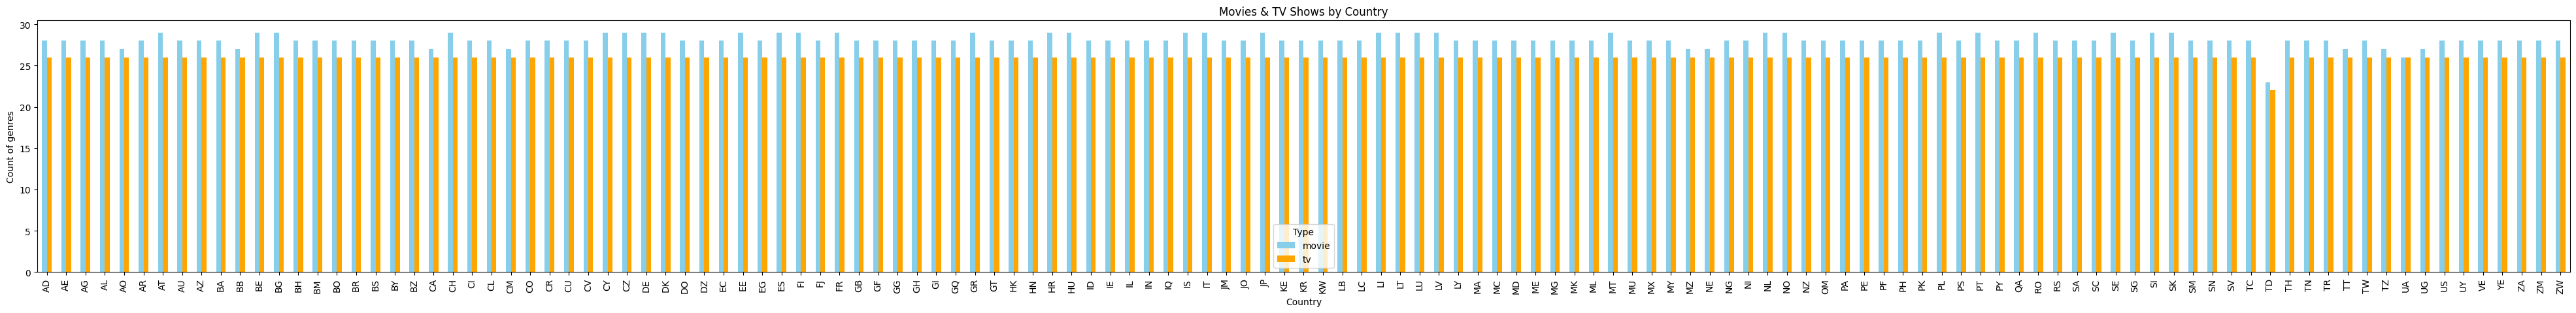

In [71]:
# Plot as a grouped bar chart
df_pivot.plot(kind="bar", figsize=(50, 5), color=["skyblue", "orange"])

# Labels & Title
plt.xlabel("Country")
plt.ylabel("Count of genres")
plt.title("Movies & TV Shows by Country")
plt.legend(title="Type")
plt.xticks(rotation=90)  # Rotate country names for better visibility

# Show the plot
plt.show()

#### **Section 11**

What is the movie that has more genres ?

What is the tv show that has more genres ?



In [72]:
# Convert genre string to a list
df["genres"] = df["genres"].str.split(", ")
df["genre_count"] = df["genres"].apply(len)

In [73]:
# Find the movie with the most genres
max_genre_movie = df.loc[df["genre_count"].idxmax(), ["title", "genre_count", "genres","type"]]

In [74]:
#print the movie with the most genre
print(max_genre_movie)

title                               Pororo: Cyberspace Adventure
genre_count                                                    5
genres         [Animation, Family, Fantasy, Adventure, Scienc...
type                                                       movie
Name: 6290, dtype: object


In [75]:
#I had been having issues how to make this I make it over the last table
values_to_exclude = ["movie"]
rows_to_drop = df[df['type'].isin(values_to_exclude)].index
df2 = df.drop(rows_to_drop)

In [76]:
# Find the movie with the most genres
max_genre_tv = df2.loc[df2["genre_count"].idxmax(), ["title", "genre_count","genres", "type"]]

In [77]:
#Print the tv show with most genres
print(max_genre_tv)

title                  Sex and the City
genre_count                           3
genres         [Comedy, Drama, Romance]
type                                 tv
Name: 15753, dtype: object


#### **Section 12**

what is the audiovisual production that is in most countries?

what is the audiovisaul production that is in less countries?

What is the movie in most countries?

What is the tv show in most countries?

What is the movie in less countries?

What is the tv show in less countries?

In [78]:
# Convert availableCountries string to a list
df["availableCountries"] = df["availableCountries"].str.split(", ")

#this way we can have the final number for in how many country they are
#the number is going to be added on the main dataframe for future review
df["availableCountries_count"] = df["availableCountries"].apply(len)



**what is the audiovisual production that is in most countries?**

In [79]:
#what is the audiovisual production that is in most countries?

# Find the audiovisual production in most countries
max_AvaCountry = df.loc[df["availableCountries_count"].idxmax(), ["title", "availableCountries_count", "availableCountries","type"]]
print(max_AvaCountry)

title                                          All Quiet on the Western Front
availableCountries_count                                                  131
availableCountries          [AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, B...
type                                                                    movie
Name: 2423, dtype: object


In [81]:
#what is the audiovisual production that is in less countries?

# Find the audiovisual production in less countries
min_AvaCountry = df.loc[df["availableCountries_count"].idxmin(), ["title", "availableCountries_count", "availableCountries","type"]]
print(min_AvaCountry)

title                       2001: A Space Odyssey
availableCountries_count                        1
availableCountries                           [AU]
type                                        movie
Name: 7, dtype: object


**What is the movie in most countries?**

**What is the movie in less countries?**

In [82]:
# Find the movie  in most countries

movie_filter = df.loc[(df['type'] == 'movie')]

# Find the movie in most countries
most_available_movie = movie_filter.loc[movie_filter["availableCountries_count"].idxmax(), ["title", "availableCountries_count", "availableCountries","type"]]
print(most_available_movie)

# Find the movie in less countries
less_available_movie = movie_filter.loc[movie_filter["availableCountries_count"].idxmin(), ["title", "availableCountries_count", "availableCountries","type"]]
print(less_available_movie)

title                                          All Quiet on the Western Front
availableCountries_count                                                  131
availableCountries          [AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, B...
type                                                                    movie
Name: 2423, dtype: object
title                       2001: A Space Odyssey
availableCountries_count                        1
availableCountries                           [AU]
type                                        movie
Name: 7, dtype: object


**What is the tv show in most countries?**

**What is the tv show in less countries?**

In [83]:
# Find the tv  in most countries

tv_filter = df.loc[(df['type'] == 'tv')]

# Find the tv in most countries
most_available_tv = tv_filter.loc[tv_filter["availableCountries_count"].idxmax(), ["title", "availableCountries_count", "availableCountries","type"]]
print(most_available_tv)

# Find the tv in less countries
less_available_tv = tv_filter.loc[tv_filter["availableCountries_count"].idxmin(), ["title", "availableCountries_count", "availableCountries","type"]]
print(less_available_tv)


title                                                                Seinfeld
availableCountries_count                                                  131
availableCountries          [AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, B...
type                                                                       tv
Name: 15784, dtype: object
title                       7 vidas
availableCountries_count          1
availableCountries             [ES]
type                             tv
Name: 15754, dtype: object


**investigar que pasa si se repiten los numberso que son muy bajos**

#### **Section 13**

Descriptive statistics on the number of audiovisual productions by country

Descriptive statistics on the number of movies by country

Descriptive statistics on the number of tv show by country


**Descriptive statistics on the number of audiovisual productions by country**

In [84]:
country_counts

,count
SK,8869
BG,8725
SI,8620
IS,8609
LT,8535
...,...
PF,6092
YE,6070
IL,5803
UA,3191


In [85]:
#Mean of all audiovisaul productions
mean_counts=country_counts.mean()
print("mean",mean_counts)

#Median of all audiovisaul productions
median_counts=country_counts.median()
print("median",median_counts)

#standar deviation of all audiovisual productiosn by country
std_counts=country_counts.std()
print("std",std_counts)

mean 7028.4503816793895
median 6856.0
std 927.5532015738252


In [86]:
#Mode of all audiovisaul productions
mode_counts=country_counts.mode()
print("mode",mode_counts)

mode 0    6570
1    6674
2    6723
3    6732
4    6740
5    6959
Name: count, dtype: int64


(array([ 1.,  0.,  0.,  1.,  0.,  0., 12., 75., 27., 15.]),
 array([ 738. , 1551.1, 2364.2, 3177.3, 3990.4, 4803.5, 5616.6, 6429.7,
        7242.8, 8055.9, 8869. ]),
 <BarContainer object of 10 artists>)

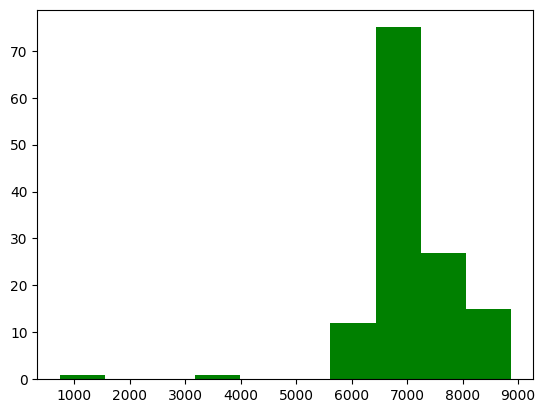

In [87]:
plt.hist(country_counts, color='green')

**Descriptive statistics on the number of movies by country**

In [88]:
df_type_by_country

type,movie,tv
availableCountries,,
AD,4111,2338
AE,4245,2513
AG,4373,2671
AL,4250,2545
AO,3924,2696
...,...,...
VE,4055,2679
YE,3546,2524
ZA,4117,2736


In [89]:
#Mean of all movies by country
mean_results_movie=df_type_by_country['movie'].mean()
print("mean",mean_results_movie)

#Median of all movies by country
median_results_movie=df_type_by_country['movie'].median()
print("median",median_results_movie)

#standar deviation for all movies by country
std_results_movie=df_type_by_country['movie'].std()
print("std",std_results_movie)

mean 4460.030534351145
median 4253.0
std 795.9645038368068


In [90]:
#Mode of all movies by country
mode_results_movie=df_type_by_country['movie'].mode()
print("mode",mode_results_movie)

mode 0    3996
1    4107
2    4147
3    4250
4    4335
5    4351
6    4381
Name: movie, dtype: int64


(array([ 1.,  0.,  1.,  0.,  0., 19., 63., 16., 17., 14.]),
 array([ 552. , 1113.6, 1675.2, 2236.8, 2798.4, 3360. , 3921.6, 4483.2,
        5044.8, 5606.4, 6168. ]),
 <BarContainer object of 10 artists>)

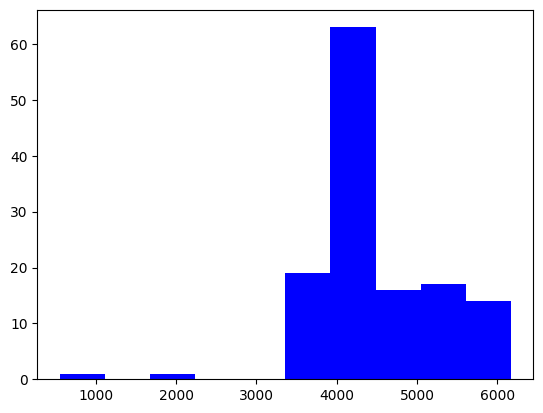

In [91]:
plt.hist(df_type_by_country['movie'], color='blue')

**Descriptive statistics on the number of tv show by country**

In [92]:
#Mean of all tv by country
mean_results_tv=df_type_by_country['tv'].mean()
print("mean",mean_results_tv)

#Median of all tv by country
median_results_tv=df_type_by_country['tv'].median()
print("median",median_results_tv)

#standar deviation
std_results_tv=df_type_by_country['tv'].std()
print("std",std_results_tv)

mean 2568.4198473282445
median 2689.0
std 311.2205241946239


In [93]:
#Mode of all movies by country
mode_results_tv=df_type_by_country['tv'].mode()
print("mode",mode_results_tv)

mode 0    2705
1    2717
Name: tv, dtype: int64


(array([ 1.,  0.,  0.,  0.,  2.,  0.,  4., 14., 38., 72.]),
 array([ 186. ,  462.5,  739. , 1015.5, 1292. , 1568.5, 1845. , 2121.5,
        2398. , 2674.5, 2951. ]),
 <BarContainer object of 10 artists>)

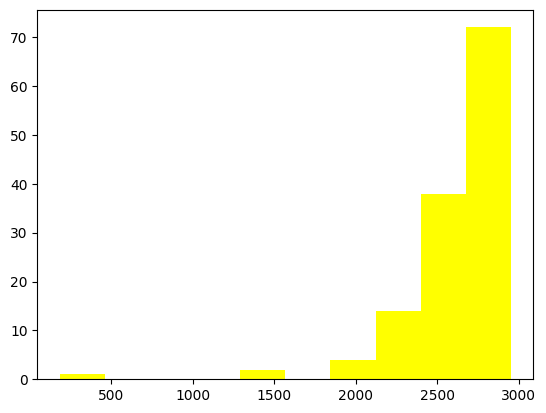

In [94]:
plt.hist(df_type_by_country['tv'], color='yellow')

#### **Section 14**

A) Which is the audiovisual production with most votes in imbd?

B) Which is the audiovisual production with less votes in imbd?

C) Which is the movie with most votes in imbd?

D) Which is the movie with less votes in imbd?

E) Which is the tv show with most votes in imbd?

F) Which is the tv show with less votes in imbd?



In [95]:
mean_votes=df['imdbNumVotes'].mean()
print(mean_votes)

median_votes=df['imdbNumVotes'].median()
print(median_votes)

mode_votes=df['imdbNumVotes'].mode()
print(mode_votes)

#stamdar deviation of the votes
std_votes=df['imdbNumVotes'].std()
print(std_votes)

31491.960943685015
1600.0
0    58.0
Name: imdbNumVotes, dtype: float64
119379.85288965666


**Which is the audiovisual production with most votes in imbd?**

In [96]:
#Most voted audiovisual production

most_voted_production=df.loc[df['imdbNumVotes'].idxmax()]

print(most_voted_production)

number_of_votes=most_voted_production['imdbNumVotes']
print(number_of_votes)



title                                                The Shawshank Redemption
type                                                                    movie
genres                                                                [Drama]
releaseYear                                                            1994.0
imdbAverageRating                                                         9.3
imdbNumVotes                                                        2983346.0
availableCountries          [AD, BA, BE, BG, CA, CV, CZ, ES, HR, HU, JP, M...
genre_count                                                                 1
availableCountries_count                                                   22
Name: 69, dtype: object
2983346.0


**Which is the audiovisual production with less votes in imbd?**

In [97]:
#Less voted audiovisual production

Less_voted_production=df.loc[df['imdbNumVotes'].idxmin()]

print(Less_voted_production)

number_of_votes_min=Less_voted_production['imdbNumVotes']
print(number_of_votes_min)



title                            The G Word
type                                  movie
genres                      [Comedy, Short]
releaseYear                          2016.0
imdbAverageRating                       5.0
imdbNumVotes                            5.0
availableCountries                     [TW]
genre_count                               2
availableCountries_count                  1
Name: 11004, dtype: object
5.0


In [98]:
# filter by tv type
tv_filter = df.loc[(df['type'] == 'tv')]

In [99]:
#Find the row with the most voted tv show
most_voted_tv=tv_filter.loc[tv_filter['imdbNumVotes'].idxmax()]

print(most_voted_tv)

number_of_votes_tv=most_voted_tv['imdbNumVotes']
print(number_of_votes_tv)

title                                                            Breaking Bad
type                                                                       tv
genres                                               [Crime, Drama, Thriller]
releaseYear                                                            2008.0
imdbAverageRating                                                         9.5
imdbNumVotes                                                        2256164.0
availableCountries          [AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, B...
genre_count                                                                 3
availableCountries_count                                                  122
Name: 15783, dtype: object
2256164.0


In [100]:
#Find the row with the most voted tv show
less_voted_tv=tv_filter.loc[tv_filter['imdbNumVotes'].idxmin()]

print(less_voted_tv)

number_of_votes_tv2=less_voted_tv['imdbNumVotes']
print(number_of_votes_tv2)

title                       Canta Comigo Teen
type                                       tv
genres                           [Reality-TV]
releaseYear                            2020.0
imdbAverageRating                         7.8
imdbNumVotes                              5.0
availableCountries                       [BR]
genre_count                                 1
availableCountries_count                    1
Name: 18292, dtype: object
5.0


In [101]:
# filter by movie
movie_filter = df.loc[(df['type'] == 'movie')]

In [102]:
#Find the row with the most voted movie
most_voted_movie=movie_filter.loc[movie_filter['imdbNumVotes'].idxmax()]

print(most_voted_movie)

number_of_votes_movie=most_voted_movie['imdbNumVotes']
print(number_of_votes_movie)

title                                                The Shawshank Redemption
type                                                                    movie
genres                                                                [Drama]
releaseYear                                                            1994.0
imdbAverageRating                                                         9.3
imdbNumVotes                                                        2983346.0
availableCountries          [AD, BA, BE, BG, CA, CV, CZ, ES, HR, HU, JP, M...
genre_count                                                                 1
availableCountries_count                                                   22
Name: 69, dtype: object
2983346.0


In [103]:
#Find the row with the most voted movie
less_voted_movie=movie_filter.loc[movie_filter['imdbNumVotes'].idxmin()]

print(less_voted_movie)

number_of_votes_movie2=less_voted_movie['imdbNumVotes']
print(number_of_votes_movie2)

title                            The G Word
type                                  movie
genres                      [Comedy, Short]
releaseYear                          2016.0
imdbAverageRating                       5.0
imdbNumVotes                            5.0
availableCountries                     [TW]
genre_count                               2
availableCountries_count                  1
Name: 11004, dtype: object
5.0


####**Section 15**

Movies with maximum number of votes by genre.


Drama, Comedy
Action
Romance
Crime
Adventure
Documentary
Thriller
Animation
Mystery
Horror
Family
Fantasy
Biography
History
Music
Sci-Fi
Sport
Reality-TV
War
Short
Musical
Game-Show
Western
Talk-Show
TV Movie
Science Fiction
Film-Noir
News
Adult


In [104]:
# filter by drama
drama_filter = df_exploded.loc[(df_exploded['genres'] == 'Drama')]

In [105]:
#eliminate last column
del drama_filter['availableCountries']

In [106]:
drama_filter.duplicated().sum()

397397

In [107]:
drama_clean=drama_filter.drop_duplicates()

In [108]:
drama_clean

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
2,Jarhead,movie,Drama,2005.0,7.0,212837.0
3,Unforgiven,movie,Drama,1992.0,8.2,446822.0
4,Eternal Sunshine of the Spotless Mind,movie,Drama,2004.0,8.3,1114500.0
5,Amores Perros,movie,Drama,2000.0,8.0,257922.0
6,A History of Violence,movie,Drama,2005.0,7.4,260406.0
...,...,...,...,...,...,...
20517,Sisters' Feud,tv,Drama,2024.0,5.2,349.0
20522,Sorry Not Sorry,tv,Drama,2024.0,NaN,NaN
20526,Asaf,tv,Drama,2024.0,5.8,1218.0
20546,Who's the Boss,tv,Drama,2024.0,NaN,NaN


In [109]:
#most voted drama movie
most_voted_drama=drama_clean.loc[drama_clean['imdbNumVotes'].idxmax()]
print(most_voted_drama)

title                The Shawshank Redemption
type                                    movie
genres                                  Drama
releaseYear                            1994.0
imdbAverageRating                         9.3
imdbNumVotes                        2983346.0
Name: 69, dtype: object


In [110]:
#less voted drama movie
less_voted_drama=drama_clean.loc[drama_clean['imdbNumVotes'].idxmin()]
print(less_voted_drama)

title                Death Days
type                      movie
genres                    Drama
releaseYear              2022.0
imdbAverageRating           7.4
imdbNumVotes                5.0
Name: 13158, dtype: object


In [111]:
# filter by comedy
comedy_filter = df_exploded.loc[(df_exploded['genres'] == 'Comedy')]

#eliminate last column
del comedy_filter['availableCountries']

#clean dataframe
comedy_clean=comedy_filter.drop_duplicates()
comedy_clean

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
13,Mars Attacks!,movie,Comedy,1996.0,6.4,249586.0
23,Beverly Hills Cop,movie,Comedy,1984.0,7.4,220885.0
24,Beverly Hills Cop II,movie,Comedy,1987.0,6.6,141744.0
26,All About My Mother,movie,Comedy,1999.0,7.8,105309.0
31,Snatch,movie,Comedy,2000.0,8.2,932301.0
...,...,...,...,...,...,...
20451,The Amazing Digital Circus,tv,Comedy,2023.0,8.0,5701.0
20455,Envious,tv,Comedy,2024.0,7.0,1262.0
20468,My Dress-Up Darling,tv,Comedy,2024.0,7.1,27.0
20476,Tsudui's Ordinary Life in an Otaku World,tv,Comedy,2024.0,NaN,NaN


In [112]:
#most voted drama movie
most_voted_comedy=comedy_clean.loc[comedy_clean['imdbNumVotes'].idxmax()]
print(most_voted_comedy)

#less voted drama movie
less_voted_comedy=comedy_clean.loc[comedy_clean['imdbNumVotes'].idxmin()]
print(less_voted_comedy)

title                Django Unchained
type                            movie
genres                         Comedy
releaseYear                    2012.0
imdbAverageRating                 8.5
imdbNumVotes                1752787.0
Name: 3484, dtype: object
title                The G Word
type                      movie
genres                   Comedy
releaseYear              2016.0
imdbAverageRating           5.0
imdbNumVotes                5.0
Name: 11004, dtype: object


In [113]:
# filter by action
action_filter = df_exploded.loc[(df_exploded['genres'] == 'Action')]

#eliminate last column
del action_filter['availableCountries']

#clean dataframe
action_clean=action_filter.drop_duplicates()
action_clean

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,The Fifth Element,movie,Action,1997.0,7.6,519483.0
1,Kill Bill: Vol. 1,movie,Action,2003.0,8.2,1229149.0
6,A History of Violence,movie,Action,2005.0,7.4,260406.0
16,Hero,movie,Action,2002.0,7.9,189630.0
19,Raiders of the Lost Ark,movie,Action,1981.0,8.4,1060503.0
...,...,...,...,...,...,...
20345,Century of Love,tv,Action,2024.0,7.9,465.0
20374,Sakuna: Of Rice and Ruin,tv,Action,2024.0,6.2,92.0
20379,Tokyo Override,tv,Action,2024.0,6.4,334.0
20492,Dendam,tv,Action,2024.0,5.8,8.0


In [114]:
#most voted action
most_voted_action=action_clean.loc[action_clean['imdbNumVotes'].idxmax()]
print(most_voted_action)

#less voted drama movie
less_voted_action=action_clean.loc[action_clean['imdbNumVotes'].idxmin()]
print(less_voted_action)

title                The Dark Knight
type                           movie
genres                        Action
releaseYear                   2008.0
imdbAverageRating                9.0
imdbNumVotes               2963729.0
Name: 47, dtype: object
title                Ghost blows out the light 2
type                                       movie
genres                                    Action
releaseYear                               2020.0
imdbAverageRating                            8.4
imdbNumVotes                                 5.0
Name: 13203, dtype: object


In [115]:
# filter by action
Romance_filter = df_exploded.loc[(df_exploded['genres'] == 'Romance')]

#eliminate last column
del Romance_filter['availableCountries']

#clean dataframe
Romance_clean=Romance_filter.drop_duplicates()
Romance_clean

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
4,Eternal Sunshine of the Spotless Mind,movie,Romance,2004.0,8.3,1114500.0
8,Talk to Her,movie,Romance,2002.0,7.9,119085.0
14,Before Sunrise,movie,Romance,1995.0,8.1,351625.0
17,Before Sunset,movie,Romance,2004.0,8.1,296994.0
21,Dirty Dancing,movie,Romance,1987.0,7.1,265049.0
...,...,...,...,...,...,...
20506,The Empress of Ayodhaya,tv,Romance,2024.0,5.3,92.0
20522,Sorry Not Sorry,tv,Romance,2024.0,NaN,NaN
20528,Love Is Blind: Argentina,tv,Romance,2024.0,5.5,154.0
20533,Nevertheless: The Shapes of Love,tv,Romance,2024.0,8.0,97.0


In [116]:
#most voted romance
most_voted_romance=Romance_clean.loc[Romance_clean['imdbNumVotes'].idxmax()]
print(most_voted_romance)

#less voted romance
less_voted_romance=Romance_clean.loc[Romance_clean['imdbNumVotes'].idxmin()]
print(less_voted_romance)

title                  Titanic
type                     movie
genres                 Romance
releaseYear             1997.0
imdbAverageRating          7.9
imdbNumVotes         1318897.0
Name: 130, dtype: object
title                Mom's Song
type                      movie
genres                  Romance
releaseYear              2020.0
imdbAverageRating           6.3
imdbNumVotes                6.0
Name: 11349, dtype: object


In [117]:
# filter by crime
Crime_filter = df_exploded.loc[(df_exploded['genres'] == 'Crime')]

#eliminate last column
del Crime_filter['availableCountries']

#clean dataframe
Crime_clean=Crime_filter.drop_duplicates()
Crime_clean

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
1,Kill Bill: Vol. 1,movie,Crime,2003.0,8.2,1229149.0
6,A History of Violence,movie,Crime,2005.0,7.4,260406.0
10,Paradise Now,movie,Crime,2005.0,7.4,24383.0
12,American History X,movie,Crime,1998.0,8.5,1215059.0
23,Beverly Hills Cop,movie,Crime,1984.0,7.4,220885.0
...,...,...,...,...,...,...
20467,Mr. McMahon,tv,Crime,2024.0,7.7,8841.0
20493,This Is the Zodiac Speaking,tv,Crime,2024.0,7.2,5776.0
20521,Cold Case: Who Killed JonBenét Ramsey,tv,Crime,2024.0,6.9,3147.0
20524,900 Days Without Anabel,tv,Crime,2024.0,6.4,549.0


In [118]:
#most voted crime
most_voted_Crime=Crime_clean.loc[Crime_clean['imdbNumVotes'].idxmax()]
print(most_voted_Crime)

#less voted crime
less_voted_Crime=Crime_clean.loc[Crime_clean['imdbNumVotes'].idxmin()]
print(less_voted_Crime)

title                The Dark Knight
type                           movie
genres                         Crime
releaseYear                   2008.0
imdbAverageRating                9.0
imdbNumVotes               2963729.0
Name: 47, dtype: object
title                New Beginnings
type                             tv
genres                        Crime
releaseYear                  2020.0
imdbAverageRating               6.0
imdbNumVotes                   10.0
Name: 18105, dtype: object


#### Section 16
The number of produductions divided by genres over the years.


In [121]:
#In this line we are going to only take the laterst 30 years of movies.
#It is easier to handle
cut_year=df_exploded['releaseYear'].max()-30

In [123]:
#in this part df_recent it is a clean dataframe with only the last 30 years of movies
df_recent=df_exploded[df_exploded['releaseYear']>=cut_year]


In [126]:
df_recent

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,Action,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Adventure,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Sci-Fi,1997.0,7.6,519483.0,AT
0,The Fifth Element,movie,Action,1997.0,7.6,519483.0,CH
0,The Fifth Element,movie,Adventure,1997.0,7.6,519483.0,CH
...,...,...,...,...,...,...,...
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PE
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,PY
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,SV
20563,La Vida es Sueño,tv,Documentary,2024.0,NaN,NaN,UY


In [124]:
#The pd.crosstab() function in Pandas is a powerful tool for creating contingency tables
 #(also known as frequency tables or cross-tabulations). It's incredibly useful for summarizing categorical
 # data and exploring relationships between different categorical variables.

 #In this section we are comparing the genres and releas year. I
genre_counts_by_year = pd.crosstab(df_recent['releaseYear'], df_recent['genres'])

In [125]:
#Review how the dataframe extract result
genre_counts_by_year.head(5)

genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Romance,Sci-Fi,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western
releaseYear,,,,,,,,,,,,,,,,,,,,,
1995.0,631,0,398,465,0,625,299,78,925,292,...,390,3,0,0,0,0,0,40,0,0
1996.0,341,0,168,62,2,663,89,104,549,153,...,267,23,0,2,8,0,0,307,0,0
1997.0,469,0,412,424,74,525,68,101,924,69,...,337,5,0,0,0,0,0,135,5,0
1998.0,631,0,312,421,12,708,272,130,990,189,...,374,28,0,75,2,0,0,91,239,0
1999.0,389,0,236,422,23,885,444,33,1160,385,...,290,40,0,7,79,0,0,56,4,0


The results of the previous frame were great.  
Exploring previous df (genre_counts_by_year) we have many 0 over the years due some genres are not so popular like others and some genres have picked years.

Based on that. I pick a few special genres.


In [128]:
#a list of selected columns
columns_keep=['Drama','Comedy','Action', 'Romance','Crime','Adventure', 'Documentary', 'Thriller' , 'Animation']

In [129]:
#Create a filtered df of genres by count
genres_by_year_clean=genre_counts_by_year[columns_keep]

In [130]:
#A review of the new dataframe generated
genres_by_year_clean.head()

genres,Drama,Comedy,Action,Romance,Crime,Adventure,Documentary,Thriller,Animation
releaseYear,,,,,,,,,
1995.0,925,625,631,390,299,398,78,40,465
1996.0,549,663,341,267,89,168,104,307,62
1997.0,924,525,469,337,68,412,101,135,424
1998.0,990,708,631,374,272,312,130,91,421
1999.0,1160,885,389,290,444,236,33,56,422


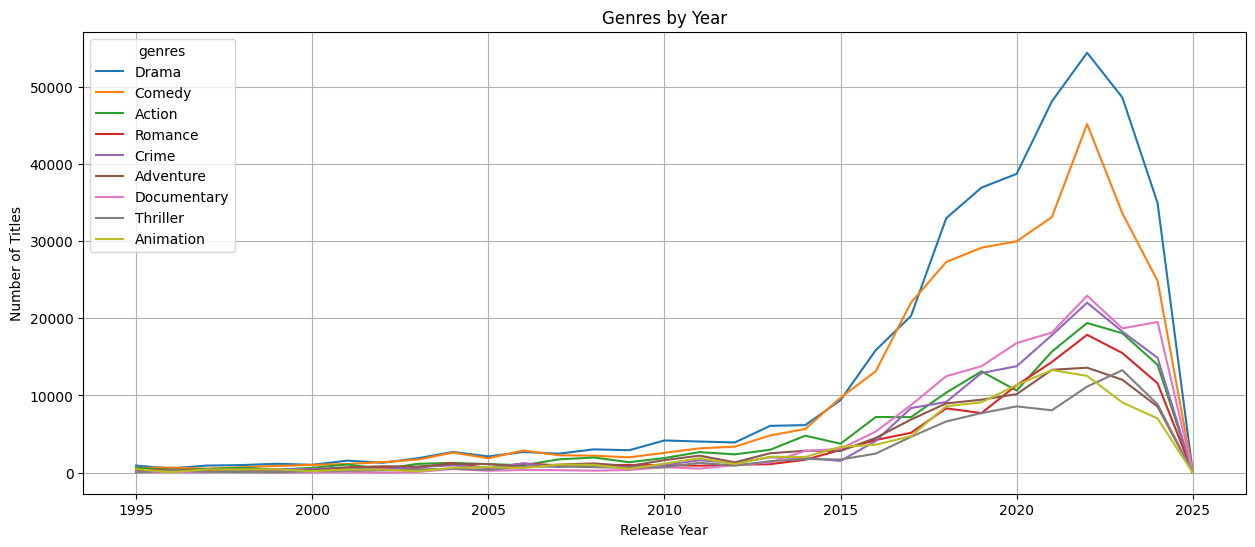

In [131]:
# Plot the data
genres_by_year_clean.plot(kind='line', figsize=(15, 6))
plt.title('Genres by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


#### Section 17

The year with most votes of all

In [133]:
#Sum the imbd votes based on each year.
sum_votes_by_year = df.groupby('releaseYear')['imdbNumVotes'].sum()
print(sum_votes_by_year)

releaseYear
1913.0        1486.0
1917.0        2411.0
1918.0        2154.0
1919.0        1901.0
1920.0        2657.0
             ...    
2021.0    19854777.0
2022.0    21116874.0
2023.0    17126706.0
2024.0     6844897.0
2025.0           0.0
Name: imdbNumVotes, Length: 106, dtype: float64


In [135]:
#Provide the year of the maximum amount of votes
print(sum_votes_by_year.idxmax())

#The total number of votes
print(sum_votes_by_year.max())

2014.0
29604243.0


### **Ideas a continuar**

El año con mayor cantidad de pliculas con mejores calificaciones

Las peliculas con mejor calificacion

Las pelciulas con mejor calificacion por genero

Las peliculas con peor calificacion  

Las peliculas con peor calificaicon por genero



Pelicula con mayor cantidad de votos por los ultimos 30 años, osea la mejor de cada año

Pelicula con menor cantidad de votos por los ultimos 30 años
osea la mejor de cada año

tv show  con mayor cantidad de votos por los ultimos 30 años
osea la mejor de cada año

tv show  con menor cantidad de votos por los ultimos 30 años
osea la mejor de cada año


**ANALISIS DE PALABRAS**

Las 10 palabras mas comunes en titulos de peliculas
Eliminar el, la the, del analisis

La moda, media y mediana en cantidad de palabas en un titulo de pelicula




